<h1 style="text-align: center; color: #4CAF50;">Dask DataFrames pour le Traitement de Données à Grande Échelle</h1>



**Auteur : Ndao Pape**

**Email : papesemoundao2016@gmail.com**

## Dask DataFrames

Les **Dask DataFrames** offrent une alternative parallèle et distribuée à **pandas** pour traiter des ensembles de données plus grands que la mémoire. Les principaux avantages incluent :

### Avantages clés :
- **Scalabilité** : Traitez des ensembles de données plus grands que la mémoire en travaillant sur des morceaux de données (chunks).
- **API familière** : Interface similaire à celle de pandas, facilitant l'adoption.
- **Traitement parallèle** : Parallélisation automatique sur les cœurs CPU.
- **Évaluation paresseuse** : Les opérations ne sont exécutées que lorsque les résultats sont nécessaires.
- **Efficacité mémoire** : Traitez les données en morceaux sans charger tout le fichier en mémoire.

### Applications en data engineering :
Les **Dask DataFrames** sont essentiels pour :
- **Traitement de grands ensembles de données** : Manipuler des ensembles de données qui ne tiennent pas en mémoire.
- **Optimisation des performances** : Paralléliser les opérations sur les cœurs CPU.
- **Montée en échelle** : Passer du développement à la production avec des volumes de données plus importants.
- **Traitement incrémental** : Travailler avec les données en morceaux.
- **Intégration avec le code pandas existant** : Modifications minimales pour monter en échelle les flux de travail pandas.

### Exemple de cas d'utilisation de Dask DataFrames :
L'exemple démontre plusieurs aspects clés des **Dask DataFrames** :
- **Création et chargement** : Lecture des données à partir de plusieurs fichiers.
- **Opérations de base** : Sélection, filtrage, ajout de colonnes.
- **Agrégations** : Regroupement et résumé des données.
- **Analyse de séries temporelles** : Travail avec des données de date et d'heure.
- **Comparaison des performances** : Comparaison avec pandas pour des ensembles de données volumineux.
- **Traitement parallèle** : Répartition du travail entre les partitions.
- **Pipeline ETL complet** : Extraction, transformation et chargement des données.
- **Visualisation** : Création de graphiques à partir des données traitées.

### Quand utiliser Dask DataFrames dans les pipelines ETL :
Les **Dask DataFrames** sont particulièrement utiles dans les pipelines ETL lorsque :
- Les données sont trop volumineuses pour tenir en mémoire.
- Les opérations bénéficient de la parallélisation.
- Vous devez mettre à l'échelle du code pandas existant sans réécriture majeure.
- Vous souhaitez traiter les données de manière incrémentale par morceaux.


In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os
import time
import matplotlib.pyplot as plt
import random

In [3]:
# Créer un répertoire pour les fichiers de données
data_dir = "dask_data"
os.makedirs(data_dir, exist_ok=True)

print("DataFrame Dask")

DataFrame Dask


In [4]:

# Premièrement, créer une fonction pour générer un morceau de données
def generate_data_chunk(chunk_id, rows_per_chunk=100000):
    """Génère un morceau de données pour des transactions de vente"""
    # Créer une plage de dates
    start_date = datetime(2020, 1, 1) + timedelta(days=chunk_id * 30)
    end_date = start_date + timedelta(days=30)
    dates = [start_date + timedelta(days=random.randint(0, 29)) for _ in range(rows_per_chunk)]
    
    # Générer des identifiants de clients
    customer_ids = [f"CUST{random.randint(1, 10000):05d}" for _ in range(rows_per_chunk)]
    
    # Générer des identifiants de produits et catégories
    categories = ["Électronique", "Vêtements", "Maison", "Livres", "Nourriture"]
    product_ids = [f"PROD{random.randint(1, 1000):04d}" for _ in range(rows_per_chunk)]
    product_categories = [random.choice(categories) for _ in range(rows_per_chunk)]
    
    # Générer des identifiants de magasins
    store_ids = [f"STORE{random.randint(1, 50):02d}" for _ in range(rows_per_chunk)]
    
    # Générer des quantités et des prix
    quantities = [random.randint(1, 10) for _ in range(rows_per_chunk)]
    prices = [round(random.uniform(5.0, 500.0), 2) for _ in range(rows_per_chunk)]
    
    # Calculer le montant total
    amounts = [q * p for q, p in zip(quantities, prices)]
    
    # Créer un DataFrame
    df = pd.DataFrame({
        'date': dates,
        'customer_id': customer_ids,
        'product_id': product_ids,
        'product_category': product_categories,
        'store_id': store_ids,
        'quantity': quantities,
        'price': prices,
        'amount': amounts
    })
    
    return df

In [5]:
# Générer plusieurs morceaux de données et les enregistrer en tant que fichiers CSV
num_chunks = 20
print(f"Génération de {num_chunks} morceaux de données...")

for i in range(num_chunks):
    df_chunk = generate_data_chunk(i)
    filename = os.path.join(data_dir, f"sales_data_{i:02d}.csv")
    df_chunk.to_csv(filename, index=False)
    print(f"Morceau généré {i+1}/{num_chunks}: {filename} ({len(df_chunk)} lignes)")

Génération de 20 morceaux de données...
Morceau généré 1/20: dask_data\sales_data_00.csv (100000 lignes)
Morceau généré 2/20: dask_data\sales_data_01.csv (100000 lignes)
Morceau généré 3/20: dask_data\sales_data_02.csv (100000 lignes)
Morceau généré 4/20: dask_data\sales_data_03.csv (100000 lignes)
Morceau généré 5/20: dask_data\sales_data_04.csv (100000 lignes)
Morceau généré 6/20: dask_data\sales_data_05.csv (100000 lignes)
Morceau généré 7/20: dask_data\sales_data_06.csv (100000 lignes)
Morceau généré 8/20: dask_data\sales_data_07.csv (100000 lignes)
Morceau généré 9/20: dask_data\sales_data_08.csv (100000 lignes)
Morceau généré 10/20: dask_data\sales_data_09.csv (100000 lignes)
Morceau généré 11/20: dask_data\sales_data_10.csv (100000 lignes)
Morceau généré 12/20: dask_data\sales_data_11.csv (100000 lignes)
Morceau généré 13/20: dask_data\sales_data_12.csv (100000 lignes)
Morceau généré 14/20: dask_data\sales_data_13.csv (100000 lignes)
Morceau généré 15/20: dask_data\sales_data_14

In [6]:
# Calculer la taille totale du jeu de données
total_rows = num_chunks * 100000
print(f"Taille totale du jeu de données : {total_rows} lignes")

Taille totale du jeu de données : 2000000 lignes


In [7]:
# 1. Création des DataFrames Dask
print("\n1. Création des DataFrames Dask")


1. Création des DataFrames Dask


In [8]:
# À partir des fichiers CSV
start_time = time.time()
df = dd.read_csv(os.path.join(data_dir, "sales_data_*.csv"))
load_time = time.time() - start_time
print(f"Chargement du DataFrame Dask à partir des fichiers CSV en {load_time:.2f} secondes")

Chargement du DataFrame Dask à partir des fichiers CSV en 0.70 secondes


In [9]:
# Afficher le schéma du DataFrame
print("\nSchéma du DataFrame :")
print(df.dtypes)

# Afficher la forme du DataFrame (remarque : cela est calculé de manière paresseuse)
print(f"\nForme du DataFrame : {df.shape}")

# Afficher un échantillon des données (remarque : cela déclenche le calcul)
print("\nExemple de données :")
print(df.head())

# 2. Opérations de base
print("\n2. Opérations de base")


Schéma du DataFrame :
date                string[pyarrow]
customer_id         string[pyarrow]
product_id          string[pyarrow]
product_category    string[pyarrow]
store_id            string[pyarrow]
quantity                      int64
price                       float64
amount                      float64
dtype: object

Forme du DataFrame : (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(4705965)).size() // 8, dtype=int32>, 8)

Exemple de données :
         date customer_id product_id product_category store_id  quantity  \
0  2020-01-03   CUST01842   PROD0933           Livres  STORE09         8   
1  2020-01-18   CUST02899   PROD0611     Électronique  STORE39         5   
2  2020-01-07   CUST01075   PROD0541     Électronique  STORE49         9   
3  2020-01-29   CUST07543   PROD0735     Électronique  STORE26         3   
4  2020-01-04   CUST00583   PROD0738           Livres  STORE27         3   

    price   amount  
0  216.89  1735.12  
1  116.82   584

In [10]:
# Sélectionner des colonnes
selected_df = df[['date', 'customer_id', 'product_category', 'amount']]
print("\nColonnes sélectionnées :")
print(selected_df.head())


Colonnes sélectionnées :
         date customer_id product_category   amount
0  2020-01-03   CUST01842           Livres  1735.12
1  2020-01-18   CUST02899     Électronique   584.10
2  2020-01-07   CUST01075     Électronique  3237.84
3  2020-01-29   CUST07543     Électronique  1483.32
4  2020-01-04   CUST00583           Livres   328.02


In [11]:
# Filtrer les lignes
filtered_df = df[df['amount'] > 100]
print("\nLignes filtrées (amount > 100) :")
print(filtered_df.head())


Lignes filtrées (amount > 100) :
         date customer_id product_id product_category store_id  quantity  \
0  2020-01-03   CUST01842   PROD0933           Livres  STORE09         8   
1  2020-01-18   CUST02899   PROD0611     Électronique  STORE39         5   
2  2020-01-07   CUST01075   PROD0541     Électronique  STORE49         9   
3  2020-01-29   CUST07543   PROD0735     Électronique  STORE26         3   
4  2020-01-04   CUST00583   PROD0738           Livres  STORE27         3   

    price   amount  
0  216.89  1735.12  
1  116.82   584.10  
2  359.76  3237.84  
3  494.44  1483.32  
4  109.34   328.02  


In [12]:
# Ajouter une nouvelle colonne
df['discount'] = df['amount'] * 0.1
print("\nColonne de réduction ajoutée :")
print(df[['amount', 'discount']].head())


Colonne de réduction ajoutée :
    amount  discount
0  1735.12   173.512
1   584.10    58.410
2  3237.84   323.784
3  1483.32   148.332
4   328.02    32.802


In [13]:
# 3. Agrégations
print("\n3. Agrégations")



3. Agrégations


In [14]:
# Calculer les ventes totales
start_time = time.time()
total_sales = df['amount'].sum().compute()
compute_time = time.time() - start_time
print(f"Ventes totales : ${total_sales:.2f} (calculé en {compute_time:.2f} secondes)")

Ventes totales : $2778339743.91 (calculé en 3.96 secondes)


In [15]:
# Regrouper par catégorie et calculer des statistiques
start_time = time.time()
category_stats = df.groupby('product_category').agg({
    'amount': ['sum', 'mean', 'count']
}).compute()
compute_time = time.time() - start_time
print(f"\nVentes par catégorie (calculé en {compute_time:.2f} secondes) :")
print(category_stats)


Ventes par catégorie (calculé en 5.61 secondes) :
                        amount                     
                           sum         mean   count
product_category                                   
Nourriture        5.555492e+08  1390.245943  399605
Maison            5.553472e+08  1389.434453  399693
Vêtements         5.563440e+08  1388.416339  400704
Électronique      5.562588e+08  1389.049702  400460
Livres            5.548405e+08  1388.705116  399538


In [16]:
# 4. Analyse des séries temporelles
print("\n4. Analyse des séries temporelles")


4. Analyse des séries temporelles


In [17]:
# Convertir la colonne date en datetime
df['date'] = dd.to_datetime(df['date'])

In [18]:
# Extraire l'année et le mois
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [20]:
# Regrouper par année et mois et calculer la somme des montants et des quantités
start_time = time.time()
monthly_sales = df.groupby(['year', 'month']).agg({
    'amount': 'sum',
    'quantity': 'sum'
}).compute()

# Calculer les clients uniques en utilisant map_partitions
def count_unique_customers(partition):
    return partition['customer_id'].nunique()

# Appliquer la fonction sur chaque partition
unique_customers = df.groupby(['year', 'month']).apply(count_unique_customers, meta=('customer_id', 'int')).compute()

# Ajouter la colonne 'unique_customers' dans le résultat agrégé
monthly_sales['unique_customers'] = unique_customers

compute_time = time.time() - start_time
print(f"\nVentes mensuelles (calculées en {compute_time:.2f} secondes) :")
print(monthly_sales.head(10))



Ventes mensuelles (calculées en 18.78 secondes) :
                  amount  quantity  unique_customers
year month                                          
2020 12     1.435235e+08    569319             10000
2021 2      1.299366e+08    514133              9999
     3      1.432136e+08    568761              9999
     7      1.441499e+08    569612             10000
2020 2      1.344995e+08    531712             10000
     3      1.434903e+08    568077              9999
     7      1.432501e+08    568399             10000
     11     1.387706e+08    549493             10000
     10     1.438319e+08    570019              9998
2021 1      1.436885e+08    568524             10000


In [21]:
# 5. Comparaison des performances avec Pandas
print("\n5. Comparaison des performances avec Pandas")


5. Comparaison des performances avec Pandas


In [22]:
# Tenter de charger l'ensemble du jeu de données avec pandas (cela pourrait échouer avec de grands jeux de données)
try:
    start_time = time.time()
    pandas_df = pd.concat([pd.read_csv(os.path.join(data_dir, f"sales_data_{i:02d}.csv")) 
                          for i in range(num_chunks)])
    pandas_load_time = time.time() - start_time
    print(f"Chargement du DataFrame Pandas en {pandas_load_time:.2f} secondes")
    
    # Comparer avec le temps de chargement Dask
    print(f"Dask était {pandas_load_time/load_time:.1f}x plus rapide pour le chargement")
    
    # Comparer les performances d'agrégation
    start_time = time.time()
    pandas_total = pandas_df['amount'].sum()
    pandas_compute_time = time.time() - start_time
    print(f"\nVentes totales avec Pandas : ${pandas_total:.2f} (calculées en {pandas_compute_time:.2f} secondes)")
    print(f"Dask était {pandas_compute_time/compute_time:.1f}x plus rapide pour l'agrégation")
    
except Exception as e:
    print(f"Échec du chargement de l'ensemble du jeu de données avec Pandas : {e}")
    print("Cela montre pourquoi Dask est nécessaire pour les jeux de données plus grands que la mémoire")

Chargement du DataFrame Pandas en 6.36 secondes
Dask était 9.1x plus rapide pour le chargement

Ventes totales avec Pandas : $2778339743.91 (calculées en 0.02 secondes)
Dask était 0.0x plus rapide pour l'agrégation


In [23]:
# 6. Traitement parallèle des données
print("\n6. Traitement parallèle des données")


6. Traitement parallèle des données


In [24]:
# Définir le nombre de partitions
df = df.repartition(npartitions=8)
print(f"Le DataFrame a {df.npartitions} partitions")


Le DataFrame a 8 partitions


In [25]:
# Appliquer une fonction à chaque partition
def process_partition(partition_df):
    """Traiter une partition de données"""
    # Ajouter une colonne avec la taille de la partition
    partition_df['partition_size'] = len(partition_df)
    # Ajouter une colonne avec un calcul complexe
    partition_df['complex_value'] = np.sqrt(partition_df['amount']) * np.log1p(partition_df['quantity'])
    return partition_df

In [26]:
# Appliquer la fonction à chaque partition
start_time = time.time()
processed_df = df.map_partitions(process_partition)
# Déclencher le calcul
sample_processed = processed_df.head()
compute_time = time.time() - start_time
print(f"Partitions traitées en {compute_time:.2f} secondes")
print("\nExemple de données traitées :")
print(sample_processed[['amount', 'quantity', 'partition_size', 'complex_value']])

Partitions traitées en 4.81 secondes

Exemple de données traitées :
    amount  quantity  partition_size  complex_value
0  1735.12         8          200000      91.524888
1   584.10         5          200000      43.303531
2  3237.84         9          200000     131.021745
3  1483.32         3          200000      53.391594
4   328.02         3          200000      25.107624


In [27]:
# 7. Sauvegarde des résultats
print("\n7. Sauvegarde des résultats")


7. Sauvegarde des résultats


In [28]:
# Sauvegarder les résultats agrégés dans un fichier CSV
output_dir = "dask_output"
os.makedirs(output_dir, exist_ok=True)

In [29]:
# Sauvegarder les ventes mensuelles dans un seul fichier CSV
monthly_sales.to_csv(os.path.join(output_dir, "monthly_sales.csv"))
print(f"Ventes mensuelles sauvegardées dans {os.path.join(output_dir, 'monthly_sales.csv')}")

Ventes mensuelles sauvegardées dans dask_output\monthly_sales.csv


In [30]:
# Remarque : Ceci est une opération parallèle
start_time = time.time()
processed_df.to_csv(os.path.join(output_dir, "processed_data_*.csv"), index=False)
save_time = time.time() - start_time
print(f"Données traitées sauvegardées dans {os.path.join(output_dir, 'processed_data_*.csv')} en {save_time:.2f} secondes")


Données traitées sauvegardées dans dask_output\processed_data_*.csv en 60.09 secondes


In [31]:
# 8. Pipeline ETL avancé
print("\n8. Pipeline ETL avancé")


8. Pipeline ETL avancé


In [48]:
# Définir un pipeline ETL complet
def etl_pipeline():
    # Extraction : Charger les données
    print("Extraction : Chargement des données...")
    df = dd.read_csv(os.path.join(data_dir, "sales_data_*.csv"))
    df['date'] = dd.to_datetime(df['date'])
    
    # Transformation : Nettoyer et enrichir les données
    print("Transformation : Nettoyage et enrichissement des données...")
    
    # Ajouter des parties de la date
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek
    
    # Ajouter des métriques dérivées
    df['unit_price'] = df['amount'] / df['quantity']
    df['is_weekend'] = df['day_of_week'].isin([5, 6])  # 5=Samedi, 6=Dimanche
    
    # Catégoriser les transactions
    def categorize_amount(x):
        if x < 50:
            return 'Petit'
        elif x < 200:
            return 'Moyenne'
        else:
            return 'Grande'
    
    df['transaction_size'] = df['amount'].map_partitions(
        lambda s: s.apply(categorize_amount)
    )
    
    # Agréger les données pour l'analyse
    print("Transformation : Agrégation des données...")
    
    # Ventes quotidiennes
    daily_sales = df.groupby(['year', 'month', 'day']).agg({
        'amount': 'sum',
        'quantity': 'sum'
        
    })
    
    # Performance par catégorie
    category_performance = df.groupby('product_category').agg({
        'amount': ['sum', 'mean'],
        'quantity': 'sum'
       
    })
    
    # Performance par magasin
    store_performance = df.groupby('store_id').agg({
        'amount': 'sum'
       
    })
    
    # Segmentation des clients
    customer_purchases = df.groupby('customer_id').agg({
        'amount': ['sum', 'mean', 'count']
        
    })
    
    # Chargement : Sauvegarder les résultats
    print("Chargement : Sauvegarde des résultats...")
    daily_sales.compute().to_csv(os.path.join(output_dir, "daily_sales.csv"))
    category_performance.compute().to_csv(os.path.join(output_dir, "category_performance.csv"))
    store_performance.compute().to_csv(os.path.join(output_dir, "store_performance.csv"))
    customer_purchases.compute().to_csv(os.path.join(output_dir, "customer_purchases.csv"))
    
    # Retourner les données agrégées pour le reporting
    return {
        'daily_sales': daily_sales.compute(),
        'category_performance': category_performance.compute(),
        'store_performance': store_performance.compute(),
        'customer_purchases': customer_purchases.compute()
    }

In [49]:
# Exécuter le pipeline ETL
start_time = time.time()
results = etl_pipeline()
pipeline_time = time.time() - start_time
print(f"Pipeline ETL complété en {pipeline_time:.2f} secondes")


Extraction : Chargement des données...
Transformation : Nettoyage et enrichissement des données...
Transformation : Agrégation des données...
Chargement : Sauvegarde des résultats...
Pipeline ETL complété en 56.47 secondes


In [50]:
# Afficher quelques résultats
print("\nPerformance par catégorie :")
print(results['category_performance'])

print("\nTop 5 magasins par ventes :")
print(results['store_performance'].sort_values('amount', ascending=False).head())

print("\nTop 5 clients par nombre d'achats :")
print(results['customer_purchases'].sort_values(('amount', 'count'), ascending=False).head())


Performance par catégorie :
                        amount              quantity
                           sum         mean      sum
product_category                                    
Nourriture        5.555492e+08  1390.245943  2199937
Maison            5.553472e+08  1389.434453  2198701
Vêtements         5.563440e+08  1388.416339  2203580
Électronique      5.562588e+08  1389.049702  2204120
Livres            5.548405e+08  1388.705116  2197632

Top 5 magasins par ventes :
               amount
store_id             
STORE19   56492840.25
STORE42   56252338.57
STORE01   56145484.64
STORE02   56052678.56
STORE47   56035597.54

Top 5 clients par nombre d'achats :
                amount                   
                   sum         mean count
customer_id                              
CUST02991    324894.11  1264.179416   257
CUST05674    352415.07  1426.781660   247
CUST01282    340640.60  1379.111741   247
CUST06270    350747.78  1425.803984   246
CUST06466    320565.99  1303.1137

In [51]:
# 9. Visualisation
print("\n9. Visualisation")


9. Visualisation


Graphique des ventes par catégorie sauvegardé dans dask_output\category_sales.png


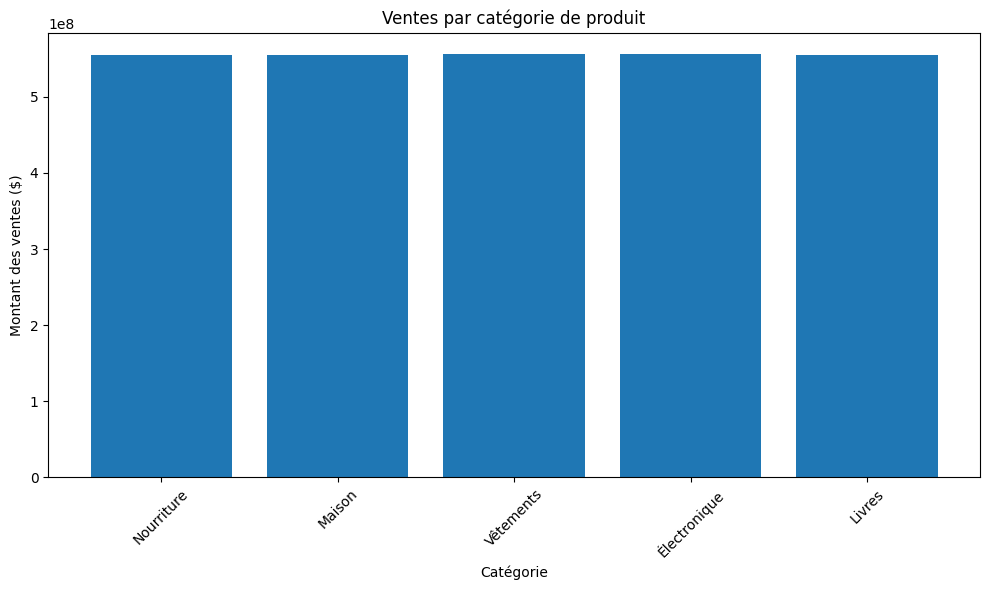

In [53]:
# Tracer les ventes quotidiennes
daily_sales = results['daily_sales'].reset_index()
daily_sales['date'] = pd.to_datetime(daily_sales[['year', 'month', 'day']])


# Tracer la performance par catégorie
category_perf = results['category_performance'].reset_index()
plt.figure(figsize=(10, 6))
plt.bar(category_perf['product_category'], category_perf[('amount', 'sum')])
plt.title('Ventes par catégorie de produit')
plt.xlabel('Catégorie')
plt.ylabel('Montant des ventes ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "category_sales.png"))
print(f"Graphique des ventes par catégorie sauvegardé dans {os.path.join(output_dir, 'category_sales.png')}")


In [54]:
# Nettoyage
print("\nNettoyage...")
# Décommenter pour supprimer les fichiers de données
# import shutil
# shutil.rmtree(data_dir, ignore_errors=True)
# shutil.rmtree(output_dir, ignore_errors=True)

print("Exemples de DataFrame Dask complétés")


Nettoyage...
Exemples de DataFrame Dask complétés
